# Harp functions: regridding and comparison
Harp is a tool used for regridding and to compare files that have data within the same time slot or area. It is used for example to select all the satellite images that contain a certain area and to reduce the data to onlyy that area from the different fles.

In [1]:
import csv
import datetime
import harp
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import Normalize
import cartopy.crs as ccrs

## Comparison
We import the NO2 data from Sentinel 5p and at the same time we see if there's some data over the aerea we are interested in, that is Athens (overpass data)

In [2]:
filename = "data/S5P_OFFL_L2__NO2____20200915T103056_20200915T121226_15153_01_010302_20200917T040857.nc"
operations = "latitude>36;latitude<40;area_covers_point(38.05, 23.86)"
try:
    overpass = harp.import_product(filename, operations)
except harp.NoDataError:
    print('No overpasses found')
print(overpass)

source product = 'S5P_OFFL_L2__NO2____20200915T103056_20200915T121226_15153_01_010302_20200917T040857.nc'
history = "2020-11-20T09:50:03Z [harp-1.12] harp.import_product('data/S5P_OFFL_L2__NO2____20200915T103056_20200915T121226_15153_01_010302_20200917T040857.nc',operations='latitude>36;latitude<40;area_covers_point(38.05, 23.86)')"

int scan_subindex {time=1}
double datetime_start {time=1} [seconds since 2010-01-01]
float datetime_length [s]
int orbit_index
long validity {time=1}
float latitude {time=1} [degree_north]
float longitude {time=1} [degree_east]
float latitude_bounds {time=1, 4} [degree_north]
float longitude_bounds {time=1, 4} [degree_east]
float sensor_latitude {time=1} [degree_north]
float sensor_longitude {time=1} [degree_east]
float sensor_altitude {time=1} [m]
float solar_zenith_angle {time=1} [degree]
float solar_azimuth_angle {time=1} [degree]
float sensor_zenith_angle {time=1} [degree]
float sensor_azimuth_angle {time=1} [degree]
double pressure_bounds {time=1, ver

We see that the data contains only one observation at 2020-09-15 at 00:00:00. We can store the overpass data in a file.

In [18]:
filename = "data/S5P_OFFL_L2VONO2____20200201T094106_20200201T112236_11932_01_010302_20200204T143211_athens.nc"
overpass = harp.import_product(filename)
print(overpass)

source product = 'S5P_OFFL_L2__NO2____20200201T094106_20200201T112236_11932_01_010302_20200204T143211.nc'
history = "2020-02-10T16:48:45Z [vdafop-1.8.0] vdafop S5P_OPER_CFG_VDAFOP_00000000T000000_99999999T999999_20191001T140933.EOF S5P_OFFL_L2__NO2____20200201T094106_20200201T112236_11932_01_010302_20200204T143211.nc\n2020-02-10T16:48:45Z [harp-1.5] harpconvert -a 'point_in_area((39.336,39.312,39.238,39.119,38.958,38.762,36.558,36.193,36.295,36.588,38.762,38.958,39.119,39.238,39.312),(23.775,24.104,24.422,24.714,24.972,25.184,27.145,26.875,20.598,20.385,22.365,22.577,22.835,23.127,23.445))' S5P_OFFL_L2__NO2____20200201T094106_20200201T112236_11932_01_010302_20200204T143211.nc S5P_OFFL_L2VONO2____20200201T094106_20200201T112236_11932_01_010302_20200204T143211_athens.nc"

int scan_subindex {time=2735}
double datetime_start {time=2735} [seconds since 2010-01-01]
float datetime_length [s]
int orbit_index
long validity {time=2735}
float latitude {time=2735} [degree_north]
float longitude {t

In [19]:
!harpconvert -a "latitude>36;latitude<40;area_covers_point(38.05, 23.86)" data/S5P_OFFL_L2__NO2____20200915T103056_20200915T121226_15153_01_010302_20200917T040857.nc data/s5p_l2_no2_athens.nc

In [20]:
overpass = harp.import_product("data/s5p_l2_no2_athens.nc")
print(overpass)

source product = 'S5P_OFFL_L2__NO2____20200915T103056_20200915T121226_15153_01_010302_20200917T040857.nc'
history = "2020-11-20T17:45:00Z [harp-1.12] harpconvert -a 'latitude>36;latitude<40;area_covers_point(38.05, 23.86)' data/S5P_OFFL_L2__NO2____20200915T103056_20200915T121226_15153_01_010302_20200917T040857.nc data/s5p_l2_no2_athens.nc"

int scan_subindex {time=1}
double datetime_start {time=1} [seconds since 2010-01-01]
float datetime_length [s]
int orbit_index
long validity {time=1}
float latitude {time=1} [degree_north]
float longitude {time=1} [degree_east]
float latitude_bounds {time=1, 4} [degree_north]
float longitude_bounds {time=1, 4} [degree_east]
float sensor_latitude {time=1} [degree_north]
float sensor_longitude {time=1} [degree_east]
float sensor_altitude {time=1} [m]
float solar_zenith_angle {time=1} [degree]
float solar_azimuth_angle {time=1} [degree]
float sensor_zenith_angle {time=1} [degree]
float sensor_azimuth_angle {time=1} [degree]
double pressure_bounds {time

In [21]:
def harp_l2geoscatterplot(product, value, colorrange=None, colortable='jet', size=1):
    variable = product[value]
    if colorrange is not None:
        vmin, vmax = colorrange
    else:
        vmin = np.nanmin(variable.data)
        vmax = np.nanmax(variable.data)

    fig=plt.figure(figsize=(20, 10))

    ax = plt.axes(projection=ccrs.PlateCarree())

    img = plt.scatter(product.longitude.data, product.latitude.data, c=variable.data, 
                      vmin=vmin, vmax=vmax, cmap=colortable, s=size, transform=ccrs.PlateCarree())

    ax.coastlines()

    cbar = fig.colorbar(img, ax=ax, orientation='horizontal', fraction=0.04, pad=0.1)
    cbar.set_label(f'{variable.description} [{variable.unit}]')
    cbar.ax.tick_params(labelsize=14)
    plt.show()

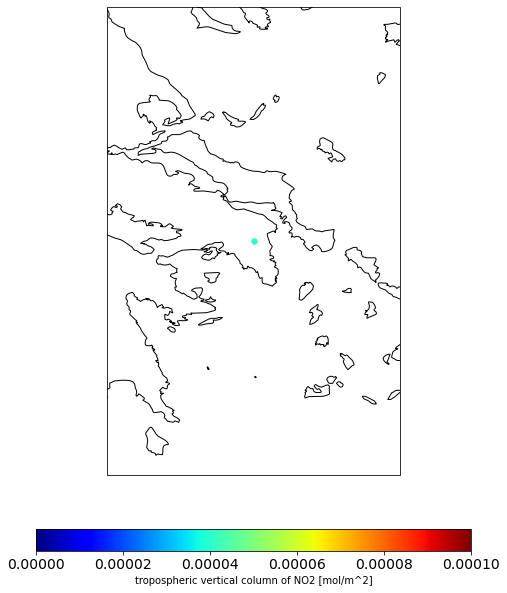

In [22]:
harp_l2geoscatterplot(overpass, 'tropospheric_NO2_column_number_density', colorrange=(0,0.0001), size=30)